**Problem statement**
* XYZ company 2014-18 sales data to identyfy key revenue and profit drivers across product,channels,and regions,uncover seasonal trends and outlier and align perormance against budgets. Use these insights to optimize pricing,promotion,and market expansion or sustainable growth and reduced concentration risk

* importing librarues

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* importing dataset

In [9]:
!pip install openpyxl

In [10]:
df=pd.read_excel("/content/drive/MyDrive/DA Project dataset/Regional Sales Dataset.xlsx", sheet_name=None)

In [11]:
#Assign dataframes to each sheet
df_sales=df["Sales Orders"]
df_customer=df["Customers"]
df_products=df["Products"]
df_regions=df["Regions"]
df_state_reg=df["State Regions"]
df_budgets=df["2017 Budgets"]

In [12]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


# col details
 line total= revenue

In [13]:
print(f"df_sales: {df_sales.shape} ,df_customer: {df_customer.shape},df_products: {df_products.shape} ,df_regions: {df_regions.shape}")


df_sales: (64104, 12) ,df_customer: (175, 2),df_products: (30, 2) ,df_regions: (994, 15)


* checking or null values

In [14]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [15]:
df_customer.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [16]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [17]:
df_state_reg.isnull().sum()

,0
State Code,0
State,0
Region,0


In [18]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [19]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


# ER- relation

In [20]:
# Merge with customer table
df=df_sales.merge(df_customer,
                  left_on="Customer Name Index",
                  right_on="Customer Index",
                  how="left")

In [21]:
# Merge with products
df=df.merge(df_products,
            left_on="Product Description Index",
            right_on="Index",
            how="left")

In [22]:
# Merge with regions
df=df.merge(df_regions,
            left_on="Delivery Region Index",
            right_on="id",
            how="left")

In [23]:
# Merge with state regions
df=df.merge(df_state_reg[["State Code", "Region"]],
            left_on="state_code",
            right_on="State Code",
            how="left")

In [24]:
# Merge with budget
df=df.merge(df_budgets,
            how='left',
            on="Product Name"

            )

In [25]:
# l=["Column1","Column2","Column3"]
# df_state_reg.drop(l,axis=,inplace=False)

In [26]:
df_state_reg.head(1)

,State Code,State,Region
0,AL,Alabama,South


In [27]:
# Merge with state regions
df=df.merge(df_state_reg[["State Code","Region"]],
            left_on="state_code",
            right_on="State Code",
            how="left")

In [28]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,households,median_income,land_area,water_area,time_zone,State Code_x,Region_x,2017 Budgets,State Code_y,Region_y
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,52798,36466,268318796,13908113,America/New York,GA,South,964940.231,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329,CT,Northeast


In [29]:
df.columns.values

array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index',
       'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'State Code_x', 'Region_x',
       '2017 Budgets', 'State Code_y', 'Region_y'], dtype=object)

**Data cleaning**
* Now we can see that we have redundant columns because we perform merge operation based on key concept so we have to delete tose columns.

In [30]:
# df5=df.copy()

In [31]:
col = ["Customer Index", "Index", "id", "State Code_y","Region_y"]
df.drop(columns=col, axis=1, inplace=True)

In [32]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code_x,Region_x,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [33]:
df.rename(columns={"Region_x": "Region", "State Code_x": "State Code"}, inplace=True)
df.columns.values

array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Names', 'Product Name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'], dtype=object)

* convert col name into lowercase

In [34]:
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       'state code', 'region', '2017 budgets'], dtype=object)

* **Caution** deleting the columns that is not useful for us(this step is done based on your knowledge and teke help if needed)

* keeping the imp col is based on problem statement


In [35]:
#keep the imported columns
cols_to_keep=['ordernumber',
              'orderdate',
              'customer name index',
              'channel',
              'product name',
              'order quantity',
              'unit price',
              'line total',
              'total unit cost',
              'county',
              'state_code',
              'state',
              'region',
              '2017 budgets',
              'latitude',
              'longitude',
               ]

In [36]:
df=df[cols_to_keep]

In [37]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,product name,order quantity,unit price,line total,total unit cost,county,state_code,state,region,2017 budgets,latitude,longitude
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,964940.231,32.08354,-81.09983
1,SO - 0003378,2014-01-01,96,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,Midwest,2067108.120,39.61366,-86.10665
2,SO - 0005126,2014-01-01,8,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,West,5685138.270,37.66243,-121.87468
3,SO - 0005614,2014-01-01,42,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,Midwest,889737.555,39.16533,-86.52639
4,SO - 0005781,2014-01-01,73,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,Northeast,1085037.329,41.77524,-72.52443


* blank out the budgets for non 2017 orders {because we have only detail of 2017 budget}

In [38]:
df.loc[df["orderdate"].dt.year != 2017, "2017 budgets"] = pd.NA
df[['orderdate',"product name","line total","2017 budgets"]].head(5)


,orderdate,product name,line total,2017 budgets
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ordernumber          64104 non-null  object        
 1   orderdate            64104 non-null  datetime64[ns]
 2   customer name index  64104 non-null  int64         
 3   channel              64104 non-null  object        
 4   product name         64104 non-null  object        
 5   order quantity       64104 non-null  int64         
 6   unit price           64104 non-null  float64       
 7   line total           64104 non-null  float64       
 8   total unit cost      64104 non-null  float64       
 9   county               64104 non-null  object        
 10  state_code           64104 non-null  object        
 11  state                64104 non-null  object        
 12  region               64104 non-null  object        
 13  2017 budgets         15263 non-

In [40]:
#filter the dataset that only include record from 2017
df_2017=df[df["orderdate"].dt.year==2017]

In [41]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ordernumber          15263 non-null  object        
 1   orderdate            15263 non-null  datetime64[ns]
 2   customer name index  15263 non-null  int64         
 3   channel              15263 non-null  object        
 4   product name         15263 non-null  object        
 5   order quantity       15263 non-null  int64         
 6   unit price           15263 non-null  float64       
 7   line total           15263 non-null  float64       
 8   total unit cost      15263 non-null  float64       
 9   county               15263 non-null  object        
 10  state_code           15263 non-null  object        
 11  state                15263 non-null  object        
 12  region               15263 non-null  object        
 13  2017 budgets         15263 non-n

# Feature engineering

In [42]:
df.head(1)

,ordernumber,orderdate,customer name index,channel,product name,order quantity,unit price,line total,total unit cost,county,state_code,state,region,2017 budgets,latitude,longitude
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,NaN,32.08354,-81.09983


In [43]:
#find the total cost
df["totalcost"]=df["order quantity"]*df["total unit cost"]

In [44]:
#find the profit and profit percentage
df["profit"]=df["line total"]-df["totalcost"]
df["profit_pct"]=df["profit"]/df["line total"]*100

# EDA {exploratary data analysis}

In our data there will be no target variable so we proceed accoordingly

1. **Create a monthly sales trend chart**

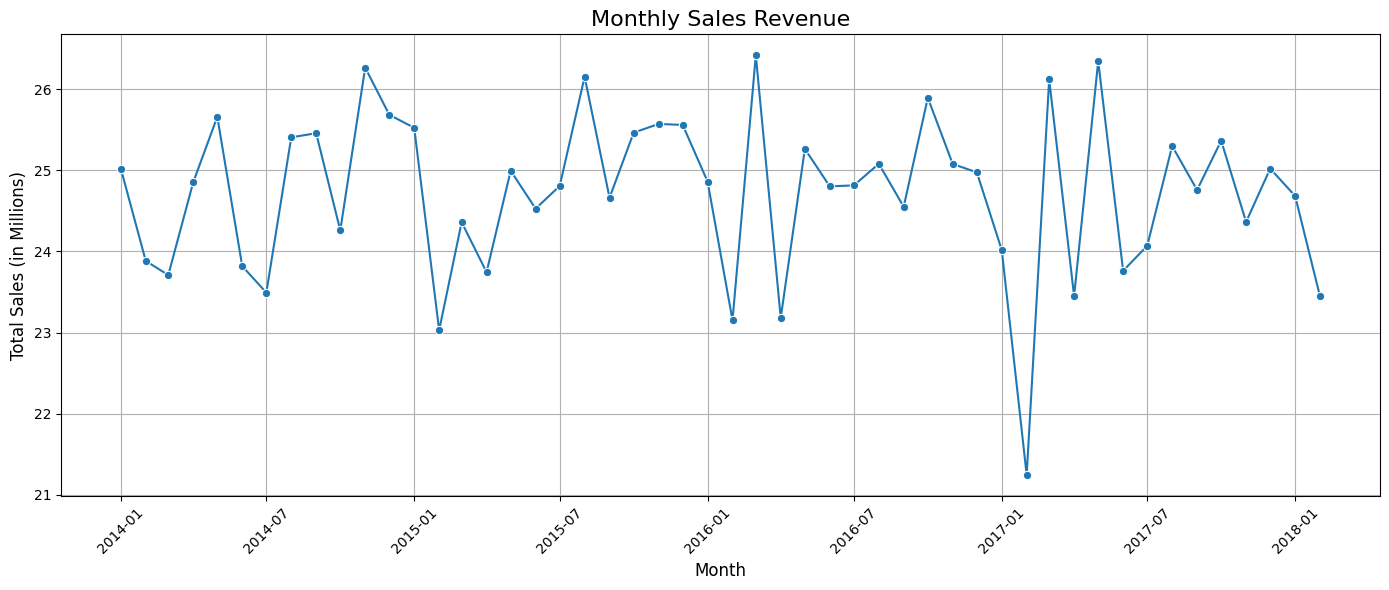

In [45]:
df["order month"] = df["orderdate"].dt.to_period("M")
monthly_sales = df.groupby("order month")["line total"].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()

monthly_sales_millions = monthly_sales / 1e6

plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_sales_millions.index, y=monthly_sales_millions.values, marker='o')
plt.title("Monthly Sales Revenue", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (in Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



1. we can say that the sales trends between (23-26)
2. We can also see that by the end of the year sales will down tragedly
3. "Monthly sales revenue remains mostly consistent between ₹23M and ₹26M, with minor fluctuations. However, there’s a noticeable trend of sales dipping toward the end of each year, potentially indicating seasonality or reduced year-end demand."

2. **Overall Monthly Sales Trend (All Years Combined)**

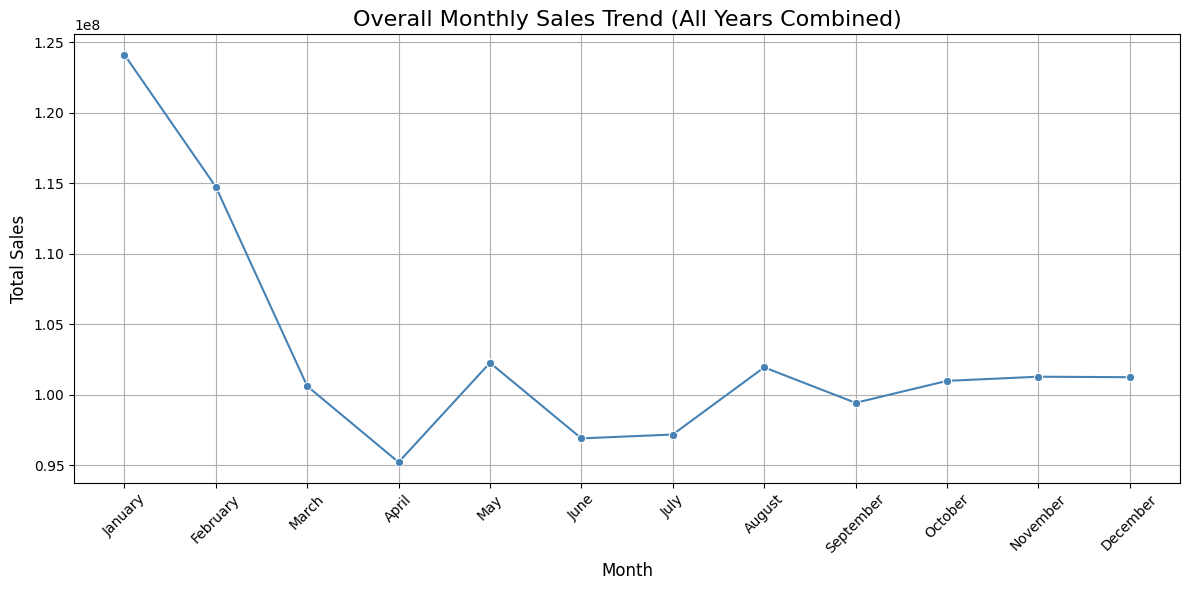

In [46]:

df["Month"] = df["orderdate"].dt.month_name()
df["Month_Num"] = df["orderdate"].dt.month


monthly_avg_sales = df.groupby(["Month_Num", "Month"])["line total"].sum().reset_index()


monthly_avg_sales = monthly_avg_sales.sort_values(by="Month_Num")


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_sales, x="Month", y="line total", marker="o", color="steelblue")

plt.title("Overall Monthly Sales Trend (All Years Combined)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



1. January is the Peak Sales Month.
2. Sales Drop Sharply After January
3. Recovery Begins in May and August
4. Flatter Pattern from September to December

3. **Top 10 products by revenue**

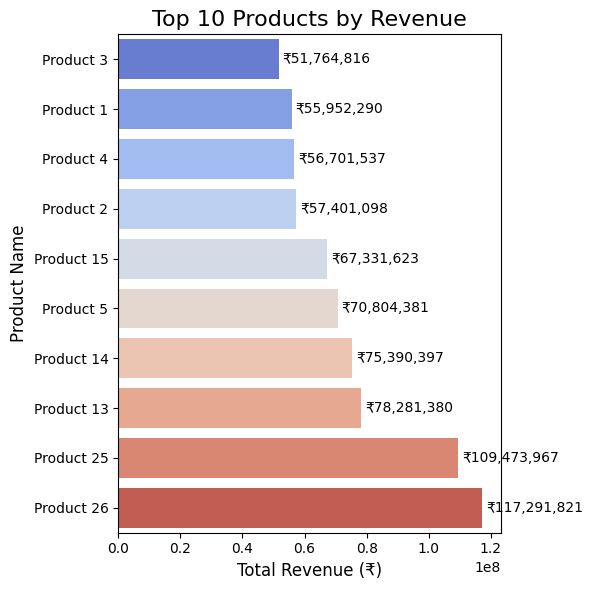

In [84]:

top_products = df.groupby("product name")["line total"].sum().reset_index()


top_10_products = top_products.sort_values(by="line total", ascending=False).head(10)


top_10_products = top_10_products.sort_values(by="line total", ascending=True)


plt.figure(figsize=(6, 6))
barplot = sns.barplot(
    data=top_10_products,
    x="line total",
    y="product name",
    hue="product name",
    palette="coolwarm",
    legend=False
)


for index, value in enumerate(top_10_products["line total"]):
    plt.text(
        value + max(top_10_products["line total"]) * 0.01,
        index,
        f"₹{value:,.0f}",
        va='center',
        fontsize=10
    )


plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue (₹)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.tight_layout()
plt.show()

4. **Sales Distribution Channel**

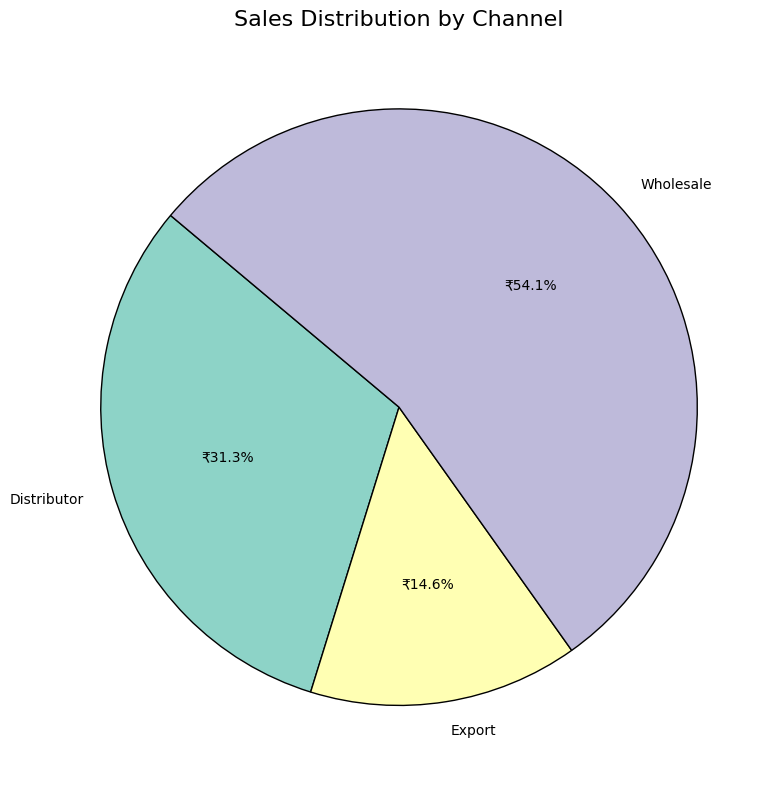

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


channel_sales = df.groupby("channel")["line total"].sum().reset_index()


labels = channel_sales["channel"]
values = channel_sales["line total"]


plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,
    autopct='₹%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors,
    wedgeprops=dict(edgecolor='black')
)


plt.title("Sales Distribution by Channel", fontsize=16)
plt.tight_layout()
plt.show()


 5. **Avearge order value distribution**

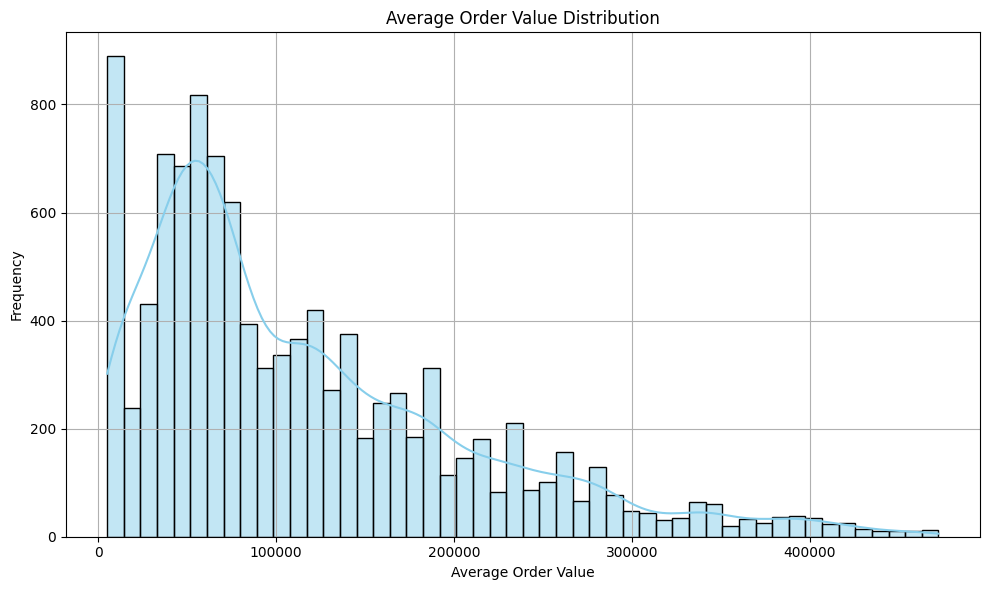

In [49]:
avg=df.groupby("ordernumber")["line total"].sum()
plt.figure(figsize=(10, 6))
sns.histplot(avg, bins=50,
             color="skyblue",
             edgecolor="black",
             kde=True)
plt.title("Average Order Value Distribution")
plt.xlabel("Average Order Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

1. Most customers make smaller purchases, and a few make bulk or high-value purchases.
2. Customer budget is around ₹50,000–₹60,000
3. Very less amount of customer spend large amount

6. **Unit price distribution per product**

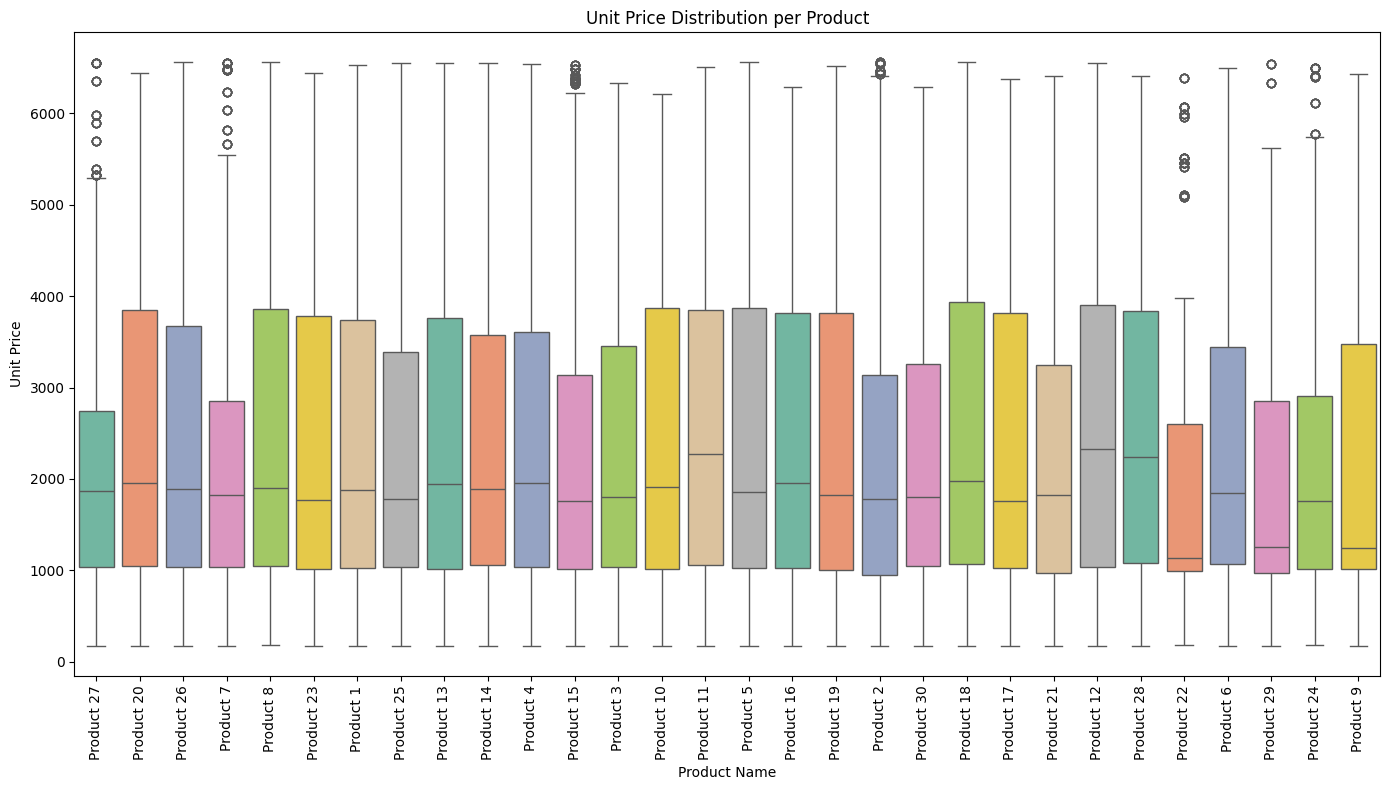

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x="product name",
    y="unit price",
    hue="product name",
    palette="Set2",
    legend=False
)


plt.title("Unit Price Distribution per Product")
plt.xlabel("Product Name")
plt.ylabel("Unit Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

7. **Unit Price Distribution per Product**

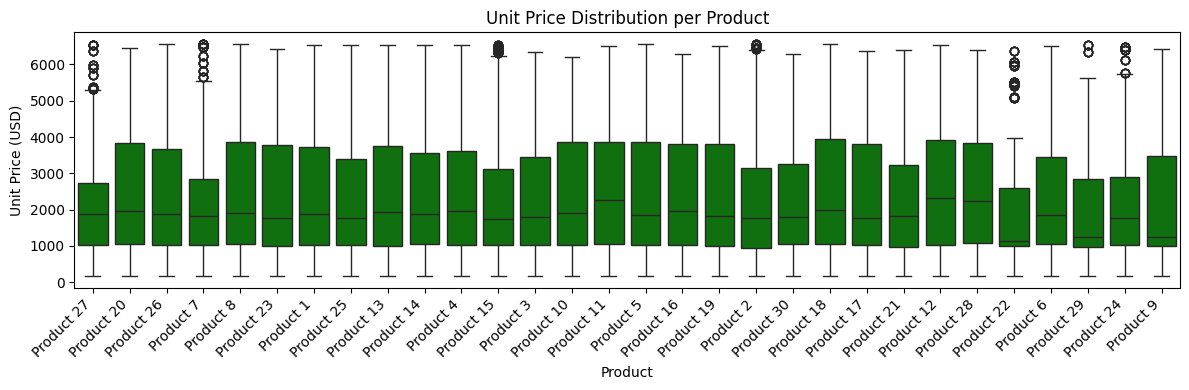

In [56]:

plt.figure(figsize=(12,4))


sns.boxplot(
    data=df,
    x='product name',
    y='unit price',
    color='g'
)


plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()


plt.show()

8. **Total Sales by US Region**

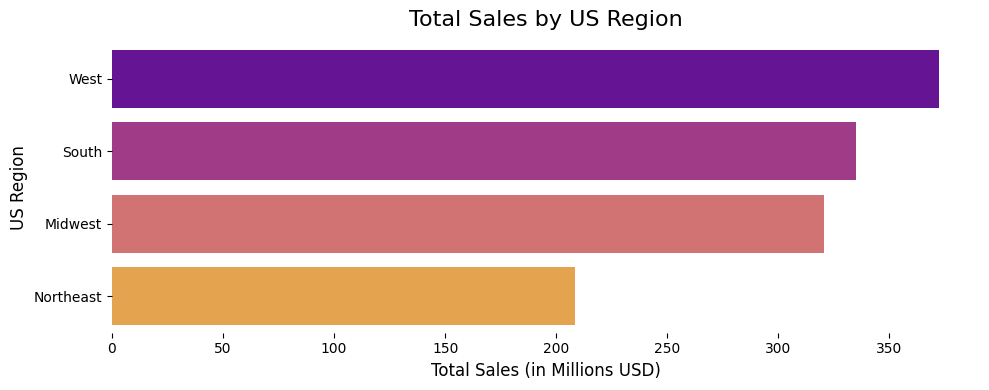

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


region_sales = (
    df
    .groupby('region')['line total']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'line total': 'Total Sales'})
)
region_sales['Total Sales'] = region_sales['Total Sales'] / 1e6


plt.figure(figsize=(10, 4))
sns.barplot(
    data=region_sales,
    x='Total Sales',
    y='region',
    hue='region',
    palette='plasma',
    legend=False
)


plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

9. **Top 10 States by Revenue and Order Count**

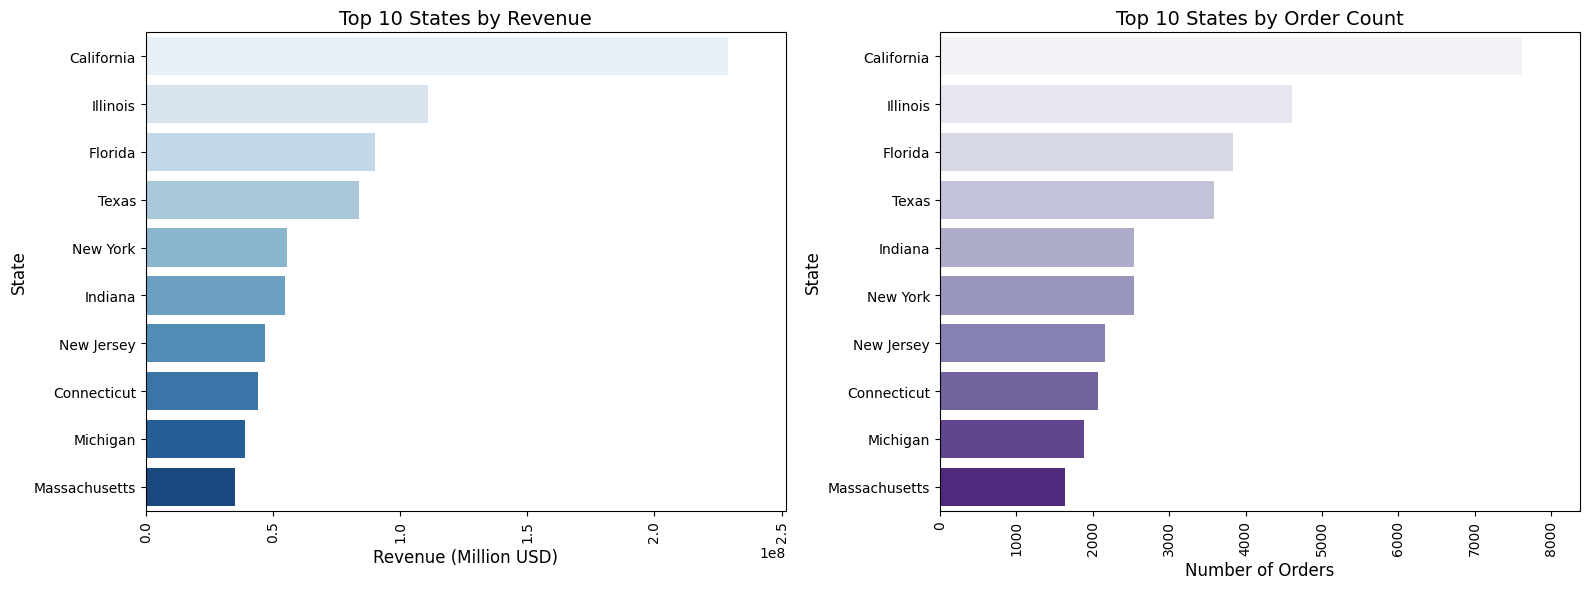

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


state_stats = df.groupby('state').agg({
    'line total': 'sum',
    'ordernumber': 'nunique'
}).rename(columns={
    'line total': 'Total Revenue',
    'ordernumber': 'Order Count'
})


top_states_by_revenue = state_stats.sort_values(by='Total Revenue', ascending=False).head(10)
top_states_by_orders = state_stats.sort_values(by='Order Count', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.barplot(
    x='Total Revenue',
    y=top_states_by_revenue.index,
    data=top_states_by_revenue.reset_index(),
    hue='state',
    palette='Blues',
    ax=axes[0],
    legend=False
)
axes[0].set_title('Top 10 States by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('State', fontsize=12)
axes[0].set_xlim(0, top_states_by_revenue['Total Revenue'].max() * 1.1)
axes[0].tick_params(axis='x', rotation=90)


sns.barplot(
    x='Order Count',
    y=top_states_by_orders.index,
    data=top_states_by_orders.reset_index(),
    hue='state',
    palette='Purples',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Top 10 States by Order Count', fontsize=14)
axes[1].set_xlabel('Number of Orders', fontsize=12)
axes[1].set_ylabel('State', fontsize=12)
axes[1].set_xlim(0, top_states_by_orders['Order Count'].max() * 1.1)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

10. **Top and Bottom 10 Customers by Revenue**

In [72]:
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'product name', 'order quantity', 'unit price', 'line total',
       'total unit cost', 'county', 'state_code', 'state', 'region',
       '2017 budgets', 'latitude', 'longitude', 'totalcost', 'profit',
       'profit_pct', 'order month', 'Month', 'Month_Num'],
      dtype='object')

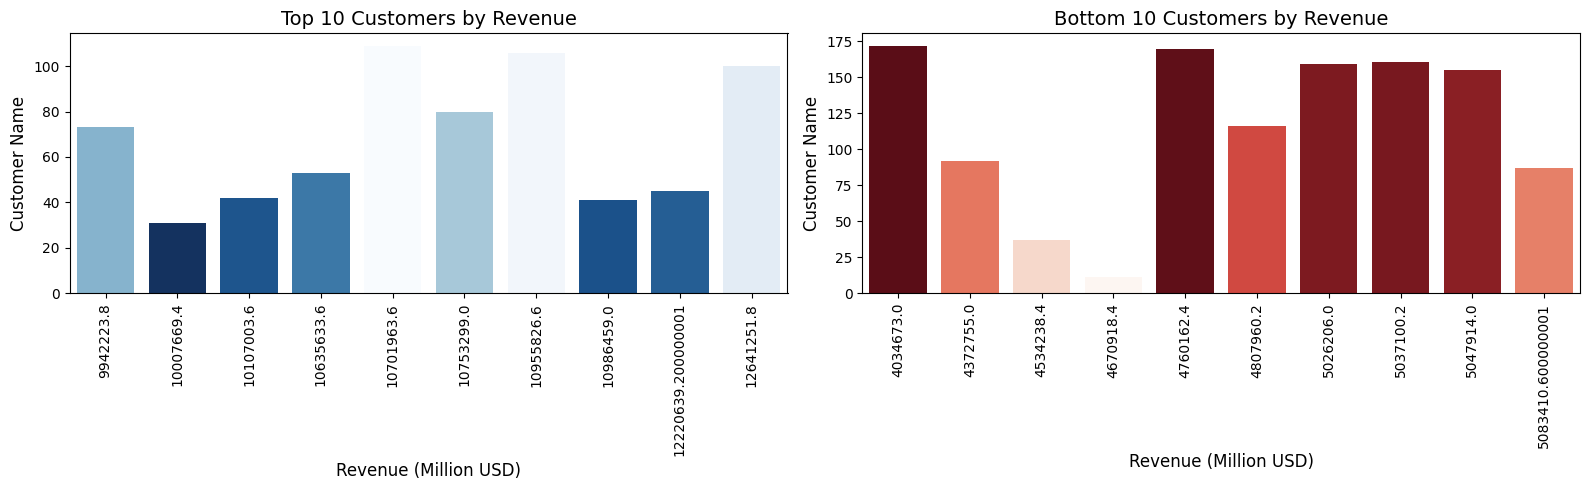

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


top_rev = (
    df.groupby('customer name index')['line total']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
      .rename(columns={'line total': 'Total Revenue'})
)


bottom_rev = (
    df.groupby('customer name index')['line total']
      .sum()
      .sort_values(ascending=True)
      .head(10)
      .reset_index()
      .rename(columns={'line total': 'Total Revenue'})
)


fig, axes = plt.subplots(1, 2, figsize=(16, 5))


sns.barplot(
    data=top_rev,
    x='Total Revenue',
    y='customer name index',
    hue='customer name index',
    palette='Blues_r',
    ax=axes[0],
    legend=False
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)


sns.barplot(
    data=bottom_rev,
    x='Total Revenue',
    y='customer name index',
    hue='customer name index',
    palette='Reds',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()
